# Handling Imbalanced Dataset with Machine Learning

In [1]:
import pandas as pd
df = pd.read_csv('../Data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.shape

(284807, 31)

In [3]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Independed and dependent features
X = df.drop("Class", axis=1)
y = df.Class

In [7]:
# Cross validation like KFOLD and Hyper parameter opti

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV


In [8]:
log_class = LogisticRegression()
grid = {'C':10.0*np.arange(-2,3), 'penalty':['l1', 'l2']}
cv = KFold(n_splits=5, random_state=None, shuffle=False)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

In [10]:
clf = GridSearchCV(log_class, grid,cv=cv, n_jobs=-1, scoring='f1_macro')
clf.fit(X_train, y_train)

/home/abhishek-r/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([-20., -10.,   0.,  10.,  20.]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [11]:
def print_metrics(expected, predicted):
    print(confusion_matrix(expected, predicted))
    print(accuracy_score(expected, predicted))
    print(classification_report(expected, predicted))



In [12]:
y_pred = clf.predict(X_test)
print_metrics(y_test, y_pred)


[[85255    44]
 [   55    89]]
0.9988413328183702
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.67      0.62      0.64       144

    accuracy                           1.00     85443
   macro avg       0.83      0.81      0.82     85443
weighted avg       1.00      1.00      1.00     85443



In [13]:
y_train.value_counts()

0    199016
1       348
Name: Class, dtype: int64

In [14]:
class_weight = dict({0:1, 1:100})

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(class_weight= class_weight)
classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [16]:
y_pred = classifier.predict(X_test)
print_metrics(y_test, y_pred)

[[85290     9]
 [   34   110]]
0.9994967405170698
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.92      0.76      0.84       144

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443




# 1 Under Sampling

In [17]:
from collections import Counter
Counter(y_train)

Counter({0: 199016, 1: 348})

In [18]:
X_train.shape

(199364, 30)

In [19]:
y_train.shape

(199364,)

In [20]:
X_test.shape

(85443, 30)

In [21]:
y_test.shape

(85443,)

In [22]:
y_train.value_counts()

0    199016
1       348
Name: Class, dtype: int64

In [23]:
y_test.value_counts()

0    85299
1      144
Name: Class, dtype: int64

In [25]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

/home/abhishek-r/.local/lib/python3.6/site-packages/imblearn/utils/_validation.py:638: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 199016, 1: 348})
The number of classes after fit Counter({0: 435, 1: 348})


In [26]:
0.8 * 435


348.0

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [28]:
y_pred = classifier.predict(X_test)
print_metrics(y_test, y_pred)

[[72771 12528]
 [   12   132]]
0.8532354903268846
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     85299
           1       0.01      0.92      0.02       144

    accuracy                           0.85     85443
   macro avg       0.51      0.88      0.47     85443
weighted avg       1.00      0.85      0.92     85443



# 2  Over Sampling 

In [30]:
from imblearn.over_sampling import RandomOverSampler

In [32]:
os = RandomOverSampler(0.75)
X_train_ns, y_train_ns = os.fit_sample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes before fit {}".format(Counter(y_train_ns)))


/home/abhishek-r/.local/lib/python3.6/site-packages/imblearn/utils/_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 199016, 1: 348})
The number of classes before fit Counter({0: 199016, 1: 149262})


In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [34]:
y_pred = classifier.predict(X_test)
print_metrics(y_test, y_pred)

[[85289    10]
 [   31   113]]
0.9995201479348805
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.92      0.78      0.85       144

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



# 3 SMOTETomek

In [35]:
from imblearn.combine import SMOTETomek

In [36]:


os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))



/home/abhishek-r/.local/lib/python3.6/site-packages/imblearn/utils/_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 199016, 1: 348})
The number of classes after fit Counter({0: 198225, 1: 148471})


In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [38]:
y_pred = classifier.predict(X_test)
print_metrics(y_test, y_pred)

[[85286    13]
 [   26   118]]
0.9995435553526912
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.90      0.82      0.86       144

    accuracy                           1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



# 4 Ensemble Techniques

In [43]:
from imblearn.ensemble import EasyEnsembleClassifier

In [45]:
easy = EasyEnsembleClassifier()

In [47]:
easy.fit(X_train, y_train)

EasyEnsembleClassifier()

In [48]:
y_pred = easy.predict(X_test)

In [49]:
print_metrics(y_test, y_pred)

[[82113  3186]
 [   10   134]]
0.9625949463384946
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85299
           1       0.04      0.93      0.08       144

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443



# OUTLIERS
# OUTLIERS
# OUTLIERS


Discussion Related With Outliers And Impact On Machine Learning!!
Which Machine LEarning Models Are Sensitive To Outliers?

   # Naivye Bayes Classifier--- Not Sensitive To Outliers
   # SVM-------- Not Sensitive To Outliers
   # Linear Regression---------- Sensitive To Outliers
   # Logistic Regression------- Sensitive To Outliers
   # Decision Tree Regressor or Classifier---- Not Sensitive
   # Ensemble(RF,XGboost,GB)------- Not Sensitive
   # KNN--------------------------- Not Sensitive
   # Kmeans------------------------ Sensitive
   # Hierarichal------------------- Sensitive
   # PCA-------------------------- Sensitive
   # Neural Networks-------------- Sensitive



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../Data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
import seaborn as sns

<AxesSubplot:xlabel='Age'>

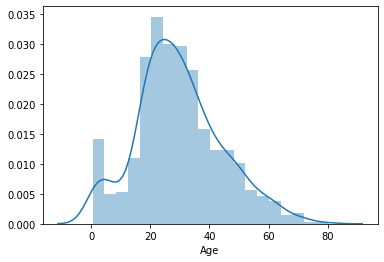

In [5]:
sns.distplot(df['Age'].dropna())

<AxesSubplot:xlabel='Age'>

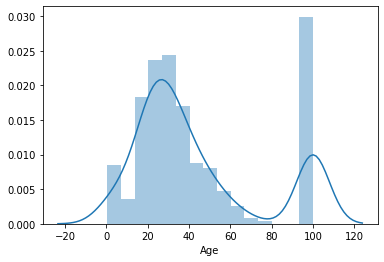

In [6]:
sns.distplot(df['Age'].fillna(100))

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Gaussian Distributed

Text(0, 0.5, 'No of passenger')

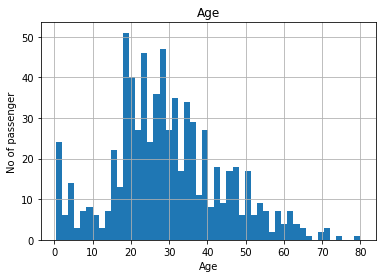

In [8]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

<AxesSubplot:>

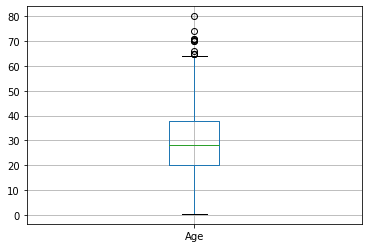

In [9]:
df.boxplot(column="Age")

In [10]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


# 1 If The Data Is Normally Distributed We use this

In [11]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

upper_boundry = df['Age'].mean() + 3*df['Age'].std()
lower_boundry = df['Age'].mean() - 3*df['Age'].std()

print('Upper : ', upper_boundry)
print('Mid :', df['Age'].mean())
print("Lower :", lower_boundry)

Upper :  73.27860964406094
Mid : 29.69911764705882
Lower : -13.880374349943303


# 2 If Features Are Skewed We Use the below Technique

Text(0, 0.5, 'No of passenger')

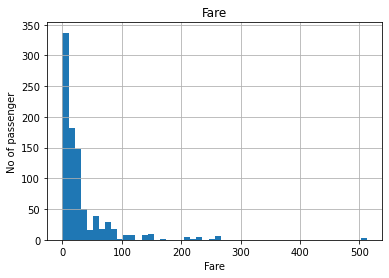

In [12]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

<AxesSubplot:>

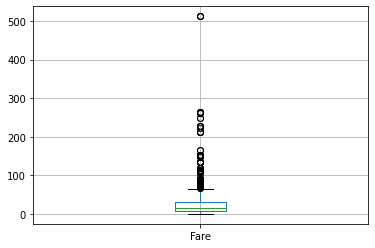

In [13]:
df.boxplot(column='Fare')

In [14]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [16]:
#### Lets compute the Interquantile range to calculate the boundaries

IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [17]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*1.5)
upper_bridge = df["Fare"].quantile(0.75) + (IQR*1.5)
print("Lower bridge", lower_bridge)
print("Upper bridge", upper_bridge)

Lower bridge -26.724
Upper bridge 65.6344


In [18]:
#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [43]:
data = df.copy()

In [44]:
data.loc[data['Age']>=73, 'Age'] = 73

In [41]:
data = data.loc[data['Fare']>=100, 'Fare'] = 100

AttributeError: 'int' object has no attribute 'loc'

Text(0, 0.5, 'No of passenger')

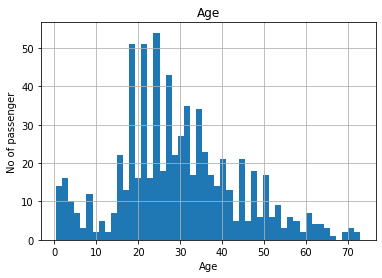

In [28]:
figure = data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

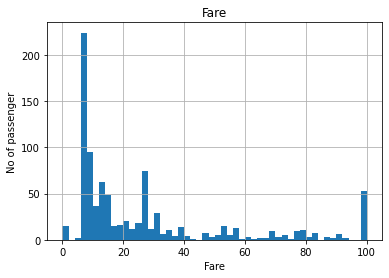

In [29]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

<AxesSubplot:>

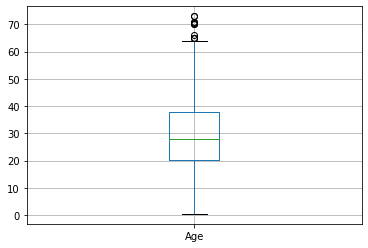

In [32]:
data.boxplot(column="Age")

<AxesSubplot:>

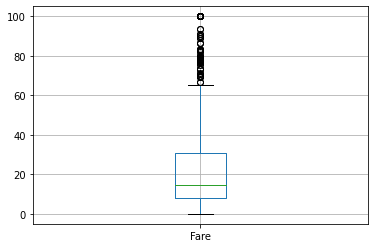

In [33]:
data.boxplot(column='Fare')

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare']].fillna(0),data['Survived'],test_size=0.3)

In [38]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy_Score: {}".format(accuracy_score(y_test, y_pred)))
print("ROC Accuracy_Score: {}".format(roc_auc_score(y_test, y_pred1[:,1])))


Accuracy_Score: 0.6455223880597015
ROC Accuracy_Score: 0.6800819341065144
